In [1]:
import os, glob
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#import plotly.figure_factory as ff
# import seaborn as sns
# import matplotlib.pyplot as plt"
# from scipy.stats import norm
# from scipy import stats
# from statsmodels.stats.weightstats import ztest

In [24]:
base_dir = "/home/pdutta/Data/EnhancerPoster/ZBTB33/DNABERT_data/"

In [25]:
np_atten = np.load("/home/pdutta/Data/EnhancerPoster/ZBTB33/DNABERT_data/concat_attn.npy")

In [26]:
len(np_atten)

995296

In [27]:
len(np_atten[0])

200

In [28]:
output_path= "/home/pdutta/Data/EnhancerPoster/ZBTB33/Output/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [29]:
def log_oods_ratio(p1,p2):
    term1 = math.log2(p1/(1-p1))
    term2 = math.log2(p2/(1-p2))
    return (term1-term2)
def calculate_diff_probab(p1,p2):
    return((p2-p1)*max(p1,p2))

In [30]:
df_dict = {}
df_list = []
pred_probab = np.load(base_dir+"concat_pred_results.npy")
print(len(pred_probab))
df = pd.read_csv(base_dir+"/all_data_new.tsv", sep= "\t")
print(df.shape)
Reference_probab = pred_probab[::2]
Alternative_probab = pred_probab[1::2]
Reference_attn = list(np_atten[::2])
Alternative_attn = list(np_atten[1::2])
df['Ref_probab']=Reference_probab
df['Alt_probab']=Alternative_probab
df['Ref_attn']=Reference_attn
df['Alt_attn']=Alternative_attn
df =  df[(df['Ref_probab'] >= 0.5) & (df['Alt_probab'] < 0.5)]
print(df.shape)
df = df[(df['ref_neucleotide'].str.len() < 5) & (df['alternative_neucleotide'].str.len() < 5)]
print(df.shape)
df['ScoreChange'] = df.apply(lambda row: calculate_diff_probab(row['Ref_probab'], row['Alt_probab']), axis=1)
df['LogOddRatio'] = df.apply(lambda row: log_oods_ratio(row['Ref_probab'], row['Alt_probab']), axis=1)

995296
(497648, 10)
(2870, 14)
(2555, 14)


In [31]:
df

,index,chr,Enhancer_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,Ref_attn,Alt_attn,ScoreChange,LogOddRatio
848,848,chr19,38740790-38740989,rs1970501697,38740793,38740794,C,G,ACTCCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,ACTGCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,0.593560,0.494330,"[0.2715375423587127, 0.2968454763772309, 0.307...","[0.29288270342271117, 0.29455928169873963, 0.3...",-0.058899,0.579073
928,928,chr19,38740790-38740989,rs552011867,38740984,38740985,C,T,ACTCCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,ACTCCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,0.593560,0.467070,"[0.2715375423587127, 0.2968454763772309, 0.307...","[0.274552567994427, 0.2943961719723375, 0.3125...",-0.075079,0.736658
929,929,chr19,38740790-38740989,rs1055983971,38740985,38740986,G,A,ACTCCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,ACTCCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,0.593560,0.465423,"[0.2715375423587127, 0.2968454763772309, 0.307...","[0.27546272098208235, 0.3011425617751689, 0.31...",-0.076057,0.746209
2088,2088,chr19,39442467-39442666,rs375517308,39442478,39442479,C,T,TGATCAAAACTCATTGCAGGCTCGATCTTTCAGGCTCAAGTGACTC...,TGATCAAAACTTATTGCAGGCTCGATCTTTCAGGCTCAAGTGACTC...,0.527952,0.383912,"[0.11171538769964043, 0.10026279554907874, 0.0...","[0.09744746708927564, 0.08952049196436804, 0.0...",-0.076046,0.843830
2090,2090,chr19,39442467-39442666,rs2078888120,39442482,39442483,G,A,TGATCAAAACTCATTGCAGGCTCGATCTTTCAGGCTCAAGTGACTC...,TGATCAAAACTCATTACAGGCTCGATCTTTCAGGCTCAAGTGACTC...,0.527952,0.468678,"[0.11171538769964043, 0.10026279554907874, 0.0...","[0.10678775550090669, 0.10131091741111195, 0.0...",-0.031294,0.342463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496257,496257,chr18,12324415-12324614,rs1381814697,12324598,12324599,C,T,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,0.534582,0.484149,"[0.12906825488199591, 0.14419442528252052, 0.1...","[0.12884676860122113, 0.14346656705173313, 0.1...",-0.026961,0.291388
496259,496259,chr18,12324415-12324614,rs1454528487,12324606,12324607,C,G,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,0.534582,0.493793,"[0.12906825488199591, 0.14419442528252052, 0.1...","[0.12745855827403377, 0.14446356766667984, 0.1...",-0.021805,0.235705
496260,496260,chr18,12324415-12324614,rs538832408,12324607,12324608,G,A,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,0.534582,0.404960,"[0.12906825488199591, 0.14419442528252052, 0.1...","[0.1291400347643924, 0.14439643229333013, 0.14...",-0.069294,0.755092
496263,496263,chr18,12324415-12324614,rs1907171652,12324610,12324611,C,T,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,0.534582,0.425885,"[0.12906825488199591, 0.14419442528252052, 0.1...","[0.12979868829171767, 0.14521174897148748, 0.1...",-0.058107,0.630760


In [32]:
#df_interest = df_interest[((df_interest['Ref_probab']>0.5) & (df_interest['Alt_probab']<0.5))|((df_interest['Ref_probab']<0.5) & (df_interest['Alt_probab']>0.5))]
# df_interest = concatenated_df[(concatenated_df['Ref_probab']>0.5)|(concatenated_df['Alt_probab']>0.5)]
# df_interest
#filtered_df1 = df[(df['Ref_probab'] >= 0.5) & (df['Alt_probab'] < 0.5)]
#filtered_df2 = df[(df['Ref_probab'] < 0.5) & (df['Alt_probab'] > 0.5)]
df_interest = df.drop(columns=['index'])
df_interest 

,chr,Enhancer_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,Ref_attn,Alt_attn,ScoreChange,LogOddRatio
848,chr19,38740790-38740989,rs1970501697,38740793,38740794,C,G,ACTCCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,ACTGCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,0.593560,0.494330,"[0.2715375423587127, 0.2968454763772309, 0.307...","[0.29288270342271117, 0.29455928169873963, 0.3...",-0.058899,0.579073
928,chr19,38740790-38740989,rs552011867,38740984,38740985,C,T,ACTCCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,ACTCCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,0.593560,0.467070,"[0.2715375423587127, 0.2968454763772309, 0.307...","[0.274552567994427, 0.2943961719723375, 0.3125...",-0.075079,0.736658
929,chr19,38740790-38740989,rs1055983971,38740985,38740986,G,A,ACTCCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,ACTCCATCTCAAAAAAAAAAAAAAAATTCAGACTCTTGACGGGGGG...,0.593560,0.465423,"[0.2715375423587127, 0.2968454763772309, 0.307...","[0.27546272098208235, 0.3011425617751689, 0.31...",-0.076057,0.746209
2088,chr19,39442467-39442666,rs375517308,39442478,39442479,C,T,TGATCAAAACTCATTGCAGGCTCGATCTTTCAGGCTCAAGTGACTC...,TGATCAAAACTTATTGCAGGCTCGATCTTTCAGGCTCAAGTGACTC...,0.527952,0.383912,"[0.11171538769964043, 0.10026279554907874, 0.0...","[0.09744746708927564, 0.08952049196436804, 0.0...",-0.076046,0.843830
2090,chr19,39442467-39442666,rs2078888120,39442482,39442483,G,A,TGATCAAAACTCATTGCAGGCTCGATCTTTCAGGCTCAAGTGACTC...,TGATCAAAACTCATTACAGGCTCGATCTTTCAGGCTCAAGTGACTC...,0.527952,0.468678,"[0.11171538769964043, 0.10026279554907874, 0.0...","[0.10678775550090669, 0.10131091741111195, 0.0...",-0.031294,0.342463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496257,chr18,12324415-12324614,rs1381814697,12324598,12324599,C,T,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,0.534582,0.484149,"[0.12906825488199591, 0.14419442528252052, 0.1...","[0.12884676860122113, 0.14346656705173313, 0.1...",-0.026961,0.291388
496259,chr18,12324415-12324614,rs1454528487,12324606,12324607,C,G,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,0.534582,0.493793,"[0.12906825488199591, 0.14419442528252052, 0.1...","[0.12745855827403377, 0.14446356766667984, 0.1...",-0.021805,0.235705
496260,chr18,12324415-12324614,rs538832408,12324607,12324608,G,A,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,0.534582,0.404960,"[0.12906825488199591, 0.14419442528252052, 0.1...","[0.1291400347643924, 0.14439643229333013, 0.14...",-0.069294,0.755092
496263,chr18,12324415-12324614,rs1907171652,12324610,12324611,C,T,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,ATAAGATTCAGAAAGCCCAAAGGAGAGAACTTTTTTTTTTTTTTTG...,0.534582,0.425885,"[0.12906825488199591, 0.14419442528252052, 0.1...","[0.12979868829171767, 0.14521174897148748, 0.1...",-0.058107,0.630760


In [33]:
df_interest [['dbsnp_id', 'varinat_start',	'variant_end']].drop_duplicates()

,dbsnp_id,varinat_start,variant_end
848,rs1970501697,38740793,38740794
928,rs552011867,38740984,38740985
929,rs1055983971,38740985,38740986
2088,rs375517308,39442478,39442479
2090,rs2078888120,39442482,39442483
...,...,...,...
496257,rs1381814697,12324598,12324599
496259,rs1454528487,12324606,12324607
496260,rs538832408,12324607,12324608
496263,rs1907171652,12324610,12324611


In [34]:
df_interest[['chr','Enhancer_coordinates']].drop_duplicates()

,chr,Enhancer_coordinates
848,chr19,38740790-38740989
2088,chr19,39442467-39442666
3056,chr19,3437545-3437744
4690,chr19,19142420-19142619
5033,chr19,44582373-44582572
...,...,...
493571,chr18,79498777-79498976
494063,chr18,9490359-9490558
494718,chr18,8934291-8934490
495770,chr18,23444327-23444526


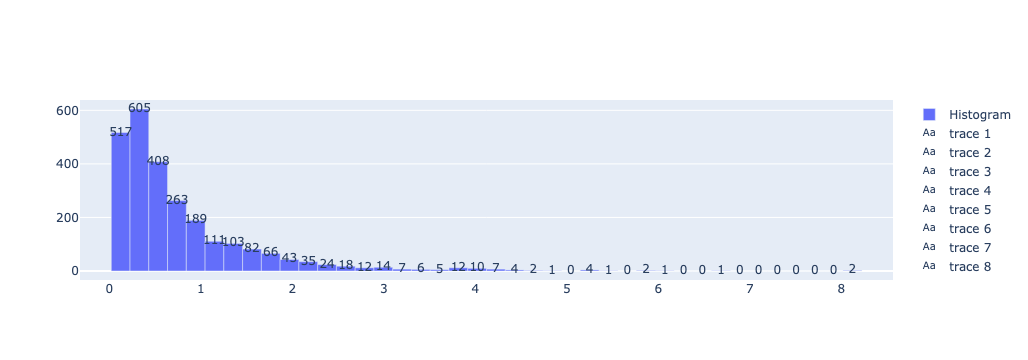

In [35]:
# Plot the figure
counts, bins = np.histogram(df_interest['LogOddRatio'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

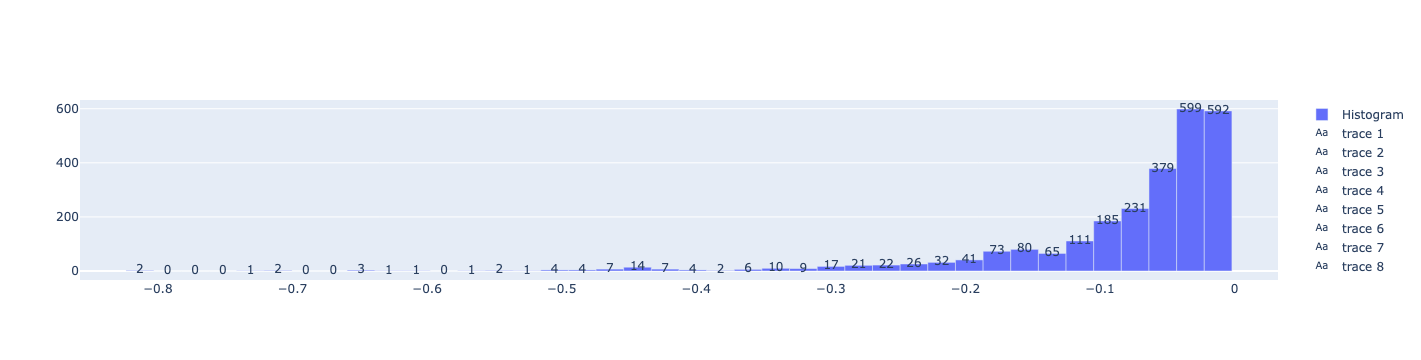

In [36]:
# Plot the figure
counts, bins = np.histogram(df_interest['ScoreChange'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

In [37]:
df_interest = df_interest[(df_interest['ScoreChange']>0.10)|(df_interest['ScoreChange']<-0.30)].reset_index(drop=True)
df_interest

,chr,Enhancer_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,Ref_attn,Alt_attn,ScoreChange,LogOddRatio
0,chr19,58043370-58043569,rs1568603525,58043374,58043375,G,A,AACGGTAACACAATGTTGTTTGTGGATTTAAACATAGAAAAGGTAC...,AACGATAACACAATGTTGTTTGTGGATTTAAACATAGAAAAGGTAC...,0.615052,0.098938,"[0.46762298154545595, 0.3226003983980696, 0.42...","[0.08386260851627693, 0.09312741951431469, 0.0...",-0.317437,3.863067
1,chr19,14430273-14430472,rs1445282456,14430273,14430274,C,T,CCTCGTGATCTGCTCGTCTGGGCCTCCCAAAGTGCTGGGGTGACAG...,TCTCGTGATCTGCTCGTCTGGGCCTCCCAAAGTGCTGGGGTGACAG...,0.934020,0.473624,"[0.21987619398132582, 0.1829454213510791, 0.14...","[0.09995102977748882, 0.10022353426954661, 0.0...",-0.430018,3.975693
2,chr11,36665374-36665573,rs1272809446,36665483,36665484,C,A,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,0.901120,0.191165,"[0.12591830751003694, 0.11490679744331603, 0.1...","[0.1510396271373201, 0.12922091919160034, 0.11...",-0.639755,5.269003
3,chr11,36665374-36665573,rs1272809446,36665483,36665484,C,T,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,0.901120,0.188648,"[0.12591830751003694, 0.11490679744331603, 0.1...","[0.14882453286384564, 0.12815024698064503, 0.1...",-0.642023,5.292603
4,chr11,36665374-36665573,rs374010920,36665484,36665485,G,A,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,0.901120,0.190248,"[0.12591830751003694, 0.11490679744331603, 0.1...","[0.15191935782823754, 0.13122048651258428, 0.1...",-0.640581,5.277569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,chr5,173063117-173063316,rs1467363988,173063117,173063118,G,T,GCAGGGTGCGGCAGTAGTATCACCAGCCAAGCCTTATATGCATTTC...,TCAGGGTGCGGCAGTAGTATCACCAGCCAAGCCTTATATGCATTTC...,0.774162,0.302691,"[0.26669833562061396, 0.3322201304143422, 0.36...","[0.18501197260956828, 0.3197601588845609, 0.32...",-0.364994,2.981295
86,chr5,173063117-173063316,rs1006969018,173063122,173063123,G,A,GCAGGGTGCGGCAGTAGTATCACCAGCCAAGCCTTATATGCATTTC...,GCAGGATGCGGCAGTAGTATCACCAGCCAAGCCTTATATGCATTTC...,0.774162,0.358016,"[0.26669833562061396, 0.3322201304143422, 0.36...","[0.20553516546397146, 0.33832258853968306, 0.3...",-0.322164,2.619857
87,chr5,173063117-173063316,rs1393698610,173063124,173063125,G,A,GCAGGGTGCGGCAGTAGTATCACCAGCCAAGCCTTATATGCATTTC...,GCAGGGTACGGCAGTAGTATCACCAGCCAAGCCTTATATGCATTTC...,0.774162,0.291388,"[0.26669833562061396, 0.3322201304143422, 0.36...","[0.18406347812477086, 0.3173320194920988, 0.29...",-0.373745,3.059402
88,chr5,173063117-173063316,rs142865666,173063125,173063126,C,T,GCAGGGTGCGGCAGTAGTATCACCAGCCAAGCCTTATATGCATTTC...,GCAGGGTGTGGCAGTAGTATCACCAGCCAAGCCTTATATGCATTTC...,0.774162,0.153588,"[0.26669833562061396, 0.3322201304143422, 0.36...","[0.2752677007451412, 0.32930852219864487, 0.33...",-0.480424,4.239634


In [38]:
#df_interest['Z_Score'] = stats.zscore(df['LogOddRatio'])
# df_interest['variant_length'] = df_interest['variant_end']-df_interest['varinat_start']
# df_interest

In [39]:
# df_interest = df_interest[df_interest['variant_length']==1]
# df_interest

In [40]:
mean = df_interest['LogOddRatio'].mean()
std = df_interest['LogOddRatio'].std()
print(mean, std)

3.7488327772382415 1.1136768342898755


In [41]:
max(df_interest['LogOddRatio'])

8.222153557439267

In [42]:
min(df_interest['LogOddRatio'])

2.442752839039507

2.6351559429483657 4.862509611528117


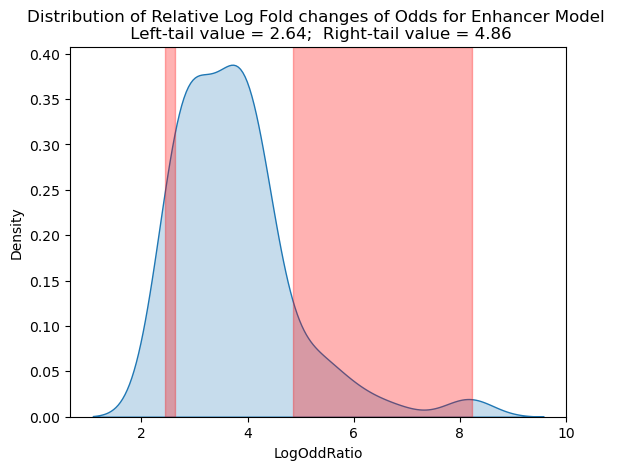

In [43]:
#print(z_score, p_value)
# Plot the distribution of 'LogOddRatio'

sns.kdeplot(df_interest['LogOddRatio'], fill=True, linewidth=1)

# # # Get the extreme values for a two tailed test at alpha = 0.05
# z_critical = norm.ppf(1 - 0.05/2) # two-tailed test at alpha = 0.05


# print(z_critical)
x1, x2 = mean +  std, mean - std
# x1= 3.3219280948873626
# x2 =-3.3219280948873626
print(x2, x1)

# Shade the area for the two tailed test
plt.axvspan(min(df_interest['LogOddRatio']), x2, alpha=0.3, color='red')
plt.axvspan(x1, max(df_interest['LogOddRatio']), alpha=0.3, color='red')

# Add the observed z-score
# plt.text(-17, 0.5, f'Left-tail value = {x2:.2f}', color='blue', ha='left', va='center')
# plt.text(-3, 0.54, f'Right-tail value = {x1:.2f}', color='blue', ha='right', va='center')

plt.title(f'Distribution of Relative Log Fold changes of Odds for Enhancer Model \n Left-tail value = {x2:.2f};  Right-tail value = {x1:.2f}')
plt.savefig(output_path+ '/Enhancer_LogOddRatio_Distribution.png')
plt.show()

In [44]:
df_selected = df_interest[(df_interest['LogOddRatio']> x1)|(df_interest['LogOddRatio']<  x2)].reset_index(drop=True)

In [45]:
df_selected

,chr,Enhancer_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,Ref_attn,Alt_attn,ScoreChange,LogOddRatio
0,chr11,36665374-36665573,rs1272809446,36665483,36665484,C,A,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,0.901120,0.191165,"[0.12591830751003694, 0.11490679744331603, 0.1...","[0.1510396271373201, 0.12922091919160034, 0.11...",-0.639755,5.269003
1,chr11,36665374-36665573,rs1272809446,36665483,36665484,C,T,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,0.901120,0.188648,"[0.12591830751003694, 0.11490679744331603, 0.1...","[0.14882453286384564, 0.12815024698064503, 0.1...",-0.642023,5.292603
2,chr11,36665374-36665573,rs374010920,36665484,36665485,G,A,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,0.901120,0.190248,"[0.12591830751003694, 0.11490679744331603, 0.1...","[0.15191935782823754, 0.13122048651258428, 0.1...",-0.640581,5.277569
3,chr9,116480840-116481039,rs1849145440,116480856,116480857,C,T,GTGTGGGAGAAGAACGCCAACCTGCTGGAAGGCTGTGAACATATGG...,GTGTGGGAGAAGAACGTCAACCTGCTGGAAGGCTGTGAACATATGG...,0.799859,0.413545,"[0.04789442576528577, 0.052447286137084305, 0....","[0.04783075774648674, 0.05416605494331119, 0.0...",-0.308996,2.502700
4,chrX,53274755-53274954,rs1307860155,53274755,53274756,C,T,CGGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,TGGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,0.928652,0.044870,"[0.5338239438467532, 0.42635074129796147, 0.34...","[0.21639029212305627, 0.4097562359761626, 0.30...",-0.820726,8.114067
5,chrX,53274755-53274954,rs1428346052,53274756,53274757,G,A,CGGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,CAGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,0.928652,0.041766,"[0.5338239438467532, 0.42635074129796147, 0.34...","[0.3178155701151633, 0.3521197786774463, 0.267...",-0.823608,8.222154
6,chrX,53274755-53274954,rs1556869190,53274757,53274758,G,A,CGGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,CGACCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,0.928652,0.174463,"[0.5338239438467532, 0.42635074129796147, 0.34...","[0.3520173070382338, 0.3900381822882202, 0.313...",-0.700379,5.944605
7,chrX,53274755-53274954,rs2074801574,53274759,53274760,C,A,CGGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,CGGCATGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,0.928652,0.161977,"[0.5338239438467532, 0.42635074129796147, 0.34...","[0.4576392671363028, 0.2983736556654264, 0.235...",-0.711975,6.073397
8,chr12,31814186-31814385,rs980108068,31814368,31814369,C,T,CAAGAAAAGTAAGAAAAATGATGTGGGGAATCTTTTAACAAATGAT...,CAAGAAAAGTAAGAAAAATGATGTGGGGAATCTTTTAACAAATGAT...,0.801413,0.426038,"[0.05685886473591326, 0.060311671021813465, 0....","[0.06414055779615309, 0.06904155121945584, 0.0...",-0.300831,2.442753
9,chr6,34263900-34264099,rs1763098867,34263908,34263909,G,T,CAGCCTTCGCGGCCTGGGCTCATGTGATCCTCCCATCTTCACTTCC...,CAGCCTTCTCGGCCTGGGCTCATGTGATCCTCCCATCTTCACTTCC...,0.844904,0.105673,"[0.11029014487149927, 0.10267235115036707, 0.0...","[0.1385389610039522, 0.12783433111242556, 0.11...",-0.624579,5.526817


In [46]:
len(df_selected['dbsnp_id'].unique())

19

In [47]:
len(df_selected['Enhancer_coordinates'].unique())

13

In [48]:
df_selected.to_csv(output_path+"/Enhancer_candidates_stringent_new.tsv", sep= "\t", index=False)
# Save to a .tsv file
df_selected[['dbsnp_id', 'varinat_start','variant_end']].drop_duplicates().to_csv(output_path+"/Unique_DBSNP_stringent_new.tsv", sep="\t",  index=False)
df_selected[['chr','Enhancer_coordinates']].drop_duplicates().to_csv(output_path+"/Unique_Enhancers_stringent_new.tsv", sep="\t", index=False)

# Visualization

In [49]:
# Splitting the 'Enhancer_coordinates' column into 'Enhancer_start' and 'Enhancer_end'
df_selected[['Enhancer_start', 'Enhancer_end']] = df_selected['Enhancer_coordinates'].str.split('-', expand=True)

# Dropping the 'index' and 'Enhancer_coordinates' columns
df_selected.drop(columns=['Enhancer_coordinates'], inplace=True)
# Reordering columns to make 'Enhancer_start' and 'Enhancer_end' the 2nd and 3rd columns
cols = df_selected.columns.tolist()
# Position where you want to insert the new columns
position = 1
# Rearranging the column order
new_cols = cols[:position] + ['Enhancer_start', 'Enhancer_end'] + cols[position:-2]
df_selected = df_selected[new_cols]

In [50]:
df_selected['Enhancer_start'] = df_selected['Enhancer_start'].astype(int)
df_selected['Enhancer_end'] = df_selected['Enhancer_end'].astype(int)

In [51]:
df_selected

,chr,Enhancer_start,Enhancer_end,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,Ref_attn,Alt_attn,ScoreChange,LogOddRatio
0,chr11,36665374,36665573,rs1272809446,36665483,36665484,C,A,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,0.901120,0.191165,"[0.12591830751003694, 0.11490679744331603, 0.1...","[0.1510396271373201, 0.12922091919160034, 0.11...",-0.639755,5.269003
1,chr11,36665374,36665573,rs1272809446,36665483,36665484,C,T,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,0.901120,0.188648,"[0.12591830751003694, 0.11490679744331603, 0.1...","[0.14882453286384564, 0.12815024698064503, 0.1...",-0.642023,5.292603
2,chr11,36665374,36665573,rs374010920,36665484,36665485,G,A,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,AAAGCCAGGTCCACCCAATATGGCATCTCCCACCCTCTTTTCCTTG...,0.901120,0.190248,"[0.12591830751003694, 0.11490679744331603, 0.1...","[0.15191935782823754, 0.13122048651258428, 0.1...",-0.640581,5.277569
3,chr9,116480840,116481039,rs1849145440,116480856,116480857,C,T,GTGTGGGAGAAGAACGCCAACCTGCTGGAAGGCTGTGAACATATGG...,GTGTGGGAGAAGAACGTCAACCTGCTGGAAGGCTGTGAACATATGG...,0.799859,0.413545,"[0.04789442576528577, 0.052447286137084305, 0....","[0.04783075774648674, 0.05416605494331119, 0.0...",-0.308996,2.502700
4,chrX,53274755,53274954,rs1307860155,53274755,53274756,C,T,CGGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,TGGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,0.928652,0.044870,"[0.5338239438467532, 0.42635074129796147, 0.34...","[0.21639029212305627, 0.4097562359761626, 0.30...",-0.820726,8.114067
5,chrX,53274755,53274954,rs1428346052,53274756,53274757,G,A,CGGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,CAGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,0.928652,0.041766,"[0.5338239438467532, 0.42635074129796147, 0.34...","[0.3178155701151633, 0.3521197786774463, 0.267...",-0.823608,8.222154
6,chrX,53274755,53274954,rs1556869190,53274757,53274758,G,A,CGGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,CGACCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,0.928652,0.174463,"[0.5338239438467532, 0.42635074129796147, 0.34...","[0.3520173070382338, 0.3900381822882202, 0.313...",-0.700379,5.944605
7,chrX,53274755,53274954,rs2074801574,53274759,53274760,C,A,CGGCCTGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,CGGCATGCTTTAGCTGCATTTCTTTAACTATTAGTAAGCTTGGGCA...,0.928652,0.161977,"[0.5338239438467532, 0.42635074129796147, 0.34...","[0.4576392671363028, 0.2983736556654264, 0.235...",-0.711975,6.073397
8,chr12,31814186,31814385,rs980108068,31814368,31814369,C,T,CAAGAAAAGTAAGAAAAATGATGTGGGGAATCTTTTAACAAATGAT...,CAAGAAAAGTAAGAAAAATGATGTGGGGAATCTTTTAACAAATGAT...,0.801413,0.426038,"[0.05685886473591326, 0.060311671021813465, 0....","[0.06414055779615309, 0.06904155121945584, 0.0...",-0.300831,2.442753
9,chr6,34263900,34264099,rs1763098867,34263908,34263909,G,T,CAGCCTTCGCGGCCTGGGCTCATGTGATCCTCCCATCTTCACTTCC...,CAGCCTTCTCGGCCTGGGCTCATGTGATCCTCCCATCTTCACTTCC...,0.844904,0.105673,"[0.11029014487149927, 0.10267235115036707, 0.0...","[0.1385389610039522, 0.12783433111242556, 0.11...",-0.624579,5.526817


In [52]:
merged_list = list(zip(df_selected['reference_seq'], df_selected['alt_seq']))
all_seq = [item.upper() for tup in merged_list for item in tup ]
kmers = [list(seq) for seq in all_seq]

In [53]:
len(kmers)

40

In [54]:
visualization_path = output_path + "/Visualization"
if not os.path.exists(visualization_path):
    os.makedirs(visualization_path)

In [55]:
def add_variant_annotations(ax, sequence, attention_scores, start_index, variant_start, variant_end, cmap, variant_length):
    # Normalize the attention_scores to the range of the colormap
    norm = plt.Normalize(vmin=np.min(attention_scores), vmax=np.max(attention_scores))
    
    # Get the RGBA colors from the normalized attention score
    rgba_colors = [cmap(norm(score)) for score in attention_scores]
    
    # Determine the positions to color red
    variant_positions = range(variant_start-start_index, variant_start + variant_length-start_index)
    #print(variant_positions, start_index)
    
    # Assuming each character in sequence is one nucleotide and their attention score is at the same index
    for idx, (nucleotide, rgba) in enumerate(zip(sequence, rgba_colors)):
        # Calculate luminance of the RGBA color
        luminance = (0.299 * rgba[0] + 0.587 * rgba[1] + 0.114 * rgba[2])
        # Determine text color based on luminance
        text_color = 'white' if luminance < 0.7 else 'black'  # Adjust threshold as needed
        # Override text color for variant positions
        if idx in variant_positions:
            text_color = 'red'
        # Add text annotation with the determined color
        ax.text(idx + 0.5, 0.5, nucleotide, horizontalalignment='center', verticalalignment='center', color=text_color, fontsize=8)

In [58]:
buffer_length = 15  # Define buffer length

# Iterate over pairs of sequences (reference and alternative) and attention scores
for i in range(0, len(kmers), 2):
    if(i%20==0):
        print(i)
    sequence_ref = kmers[i]
    sequence_alt = kmers[i + 1]
    
    
    #print(filtered_df1['Reference_Nucleotide'].iloc[i // 2], filtered_df1['Alternative_Nucleotides'].iloc[i//2])
    # Calculate relative positions of variant start and end within the sequence
    relative_variant_start = df_selected['varinat_start'].iloc[i // 2] - df_selected['Enhancer_start'].iloc[i // 2]
    relative_variant_end = df_selected['variant_end'].iloc[i // 2] - df_selected['Enhancer_start'].iloc[i // 2]

    # Adjust indices for buffer length, ensuring they are within sequence boundaries
    start_index = max(0, relative_variant_start - buffer_length)
    end_index = min(len(sequence_ref), relative_variant_end + buffer_length)
    #print(relative_variant_start, relative_variant_end, start_index, end_index)

    # Check if slicing range is valid
    if start_index >= end_index:
        print("Invalid slice range, skipping...")
        continue

    # Slice the sequences and ` data
    sliced_sequence_ref = sequence_ref[start_index:end_index]
    sliced_sequence_alt = sequence_alt[start_index:end_index]
    sliced_attention_ref = df_selected['Ref_attn'].iloc[i // 2][start_index:end_index]
    sliced_attention_alt = df_selected['Alt_attn'].iloc[i // 2][start_index:end_index]
    # print(sliced_sequence_ref , sliced_sequence_alt)
    # print(sliced_attention_ref)
    # print(sliced_attention_alt)
    # input()
    # print(f"Reference Neucleotide: {filtered_df1['Reference_Nucleotide'].iloc[i // 2]}; Alternative Neucleotide: {filtered_df1['Alternative_Nucleotides'].iloc[i // 2]}")
    
    original_start_index=  max(df_selected['Enhancer_start'].iloc[i//2], df_selected['varinat_start'].iloc[i//2] - buffer_length)
    original_end_index=  min(df_selected['Enhancer_end'].iloc[i//2], df_selected['variant_end'].iloc[i//2] + buffer_length)
    #print(original_start_index, original_end_index)
    

    
    # Determine the number of ticks needed, with a tick for every 5 nucleotides
    num_ticks = (original_end_index - original_start_index) // 5 + 1  # Ensure we include the end index

    # Generate the tick positions and labels
    tick_positions = [i * 5 for i in range(num_ticks)]  # Positions in the sequence
    tick_labels = [original_start_index + pos for pos in tick_positions]  # Map to actual nucleotide positions

    # Ensure tick positions and labels do not exceed the length of the sequence or the end index
    tick_positions = [pos for pos, label in zip(tick_positions, tick_labels) if label <= original_end_index]
    tick_labels = [label for label in tick_labels if label <= original_end_index]
    # print(plot_range)
    # print(tick_positions)
    # print(tick_labels)
    
    # Calculate variant_length_change based on your actual data
    # Calculate variant_length based on the nucleotides in the variant
    ref_nucleotides = df_selected['ref_neucleotide'].iloc[i // 2]
    alt_nucleotides = df_selected['alternative_neucleotide'].iloc[i // 2]
    variant_length = max(len(ref_nucleotides), len(alt_nucleotides))
    #print(variant_length)
    
    # Create a new figure for each iteration
    fig, axs = plt.subplots(2, 1, figsize=(18, 3))
    plt.subplots_adjust(hspace=1)  # Adjust spacing between subplots
    
    #y_position = 1.08
    
        # Add text for the Acceptor Region
    plt.text(
        x=0.5, 
        y=1.30, 
        s=f"Enhancer Region: {df_selected['Enhancer_start'].iloc[i // 2]}-{df_selected['Enhancer_end'].iloc[i // 2]}", 
        horizontalalignment='center', 
        verticalalignment='center', 
        transform=plt.gcf().transFigure
    )
    #y_position -= 0.04  # Adjust the y position for the next line

    # Add text for the Variant Region
    # Replace variant_region_info with the appropriate variable or value
    plt.text(
        x=0.5, 
        y=1.24, 
        s=f"Variant Region: {df_selected['varinat_start'].iloc[i // 2]}-{df_selected['variant_end'].iloc[i // 2]}", 
        horizontalalignment='center', 
        verticalalignment='center', 
        transform=plt.gcf().transFigure
    )

    # Replace plotted_region_info with the appropriate variable or value
    plt.text(
        x=0.5, 
        y=1.18, 
        s=f"Region Plotted: {original_start_index}-{original_end_index}", 
        horizontalalignment='center', 
        verticalalignment='center', 
        transform=plt.gcf().transFigure
    )   # Create subplots
    
    # Replace plotted_region_info with the appropriate variable or value
    plt.text(
        x=0.5, 
        y=1.12, 
        s=f"Reference Neucleotide: {df_selected['ref_neucleotide'].iloc[i // 2]}; Alternative Neucleotide: {df_selected['alternative_neucleotide'].iloc[i // 2]}" , 
        horizontalalignment='center', 
        verticalalignment='center', 
        transform=plt.gcf().transFigure
    )   # Create subplots
    
    plt.text(
        x=0.5, 
        y=1.06, 
        s=f"Reference probablity: {df_selected['Ref_probab'].iloc[i // 2]:.4f}; Alternative probablity: {df_selected['Alt_probab'].iloc[i // 2]:.4f}" , 
        horizontalalignment='center', 
        verticalalignment='center', 
        transform=plt.gcf().transFigure
    )   # Create subplots
    
    plt.text(
        x=0.5, 
        y=1.00, 
        s=f"DBSNP_IDs: {df_selected['dbsnp_id'].iloc[i // 2]}" , 
        horizontalalignment='center', 
        verticalalignment='center', 
        transform=plt.gcf().transFigure
    )   # Create subplots
    
    
    # Define the colormap you are using for your heatmap
    cmap = sns.color_palette("YlGnBu", as_cmap=True)

     # Plot heatmap for reference sequence
    sns.heatmap([sliced_attention_ref], cmap=cmap, cbar=True, annot=False, ax=axs[0])
    add_variant_annotations(axs[0], sliced_sequence_ref, sliced_attention_ref, start_index, relative_variant_start, relative_variant_end, cmap, len(ref_nucleotides))
    axs[0].set_title("Reference Sequence", pad=10)
    axs[0].set_xticks(tick_positions)
    axs[0].set_xticklabels(tick_labels)

    # Plot heatmap for alternative sequence
    sns.heatmap([sliced_attention_alt], cmap=cmap, cbar=True, annot=False, ax=axs[1])
    add_variant_annotations(axs[1], sliced_sequence_alt, sliced_attention_alt, start_index, relative_variant_start, relative_variant_end, cmap, len(alt_nucleotides))
    axs[1].set_title("Alternative Sequence", pad=10)
    axs[1].set_xticks(tick_positions)
    axs[1].set_xticklabels(tick_labels)
    
    # Set the general title for the figure
    fig.text(0.5, -0.2, f"Plotted Region across variant region {df_selected['chr'].iloc[i // 2]}:{original_start_index}-{original_end_index}", ha='center', fontsize=16, fontweight='bold')
    
    # Save the plot
    plt.savefig(visualization_path + "/" + f"Paired_sequence_{df_selected['chr'].iloc[i // 2]}_{original_start_index}_{original_end_index}.png", bbox_inches='tight')
    plt.close()

0
20
